In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [13]:
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, recall_score, f1_score

In [14]:
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns


In [15]:
df = pd.read_csv("creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Description of Features

'PCA' features - V1, V2, ... V28 <br>
'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. <br>
'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. <br>
'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. <br>



### Looking at the class distributions


In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Working with Imbalanced Data

As we can see, there are 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

As we can see, there is a significant difference between the prior probabilities of the 2 classes, which is known as the class imbalance problem. The hitch with imbalanced datasets is that classification algorithms are often biased towards the majority class (generally the "negative" class) and therefore there is a higher misclassification rate for the minority class instances (generally the "positive" examples).

To deal with this issue, following are the possible solutions:
1. Data sampling -The training instances are modified in such a way that a more or less balanced class distribution is produced that allow classifiers to perform in a similar manner to standard .
2. Algorithmic modification: The algorithm itself is adapted to the data by adjusting the class_weight paramter( will weight each class example proportionally to the inverse of its frequency)
3. Cost-sensitive learning: This approach assigns a higher weight to misclassification of examples of the positive class with respect to the negative class, and therefore, try to minimize higher cost errors.

I will be using the resampling approach in this workbook.

#### Resampling techniques can be categorized into three groups or families:
1. Undersampling methods, which create a subset of the original dataset by eliminating instances (usually majority class) - however if done randomly, it can discard potentially useful data.
2. Oversampling methods, which create a superset of the original dataset by replicating some instances or creating new instances from existing ones however if done randomly, can increase the likelihood of occurring overfitting.
3. Hybrids methods, which combine both sampling approaches from above.

I will be using two hybrid methods listed below:


#### Re-sampling techniques
1. SMOTE for oversampling(create new minority examples by interpolating between existing ones) + Wilson's edited nearest neighbor (ENN) for cleaning(removes the instances of the majority class whose prediction made by KNN method is different from the majority class)

2. SMOTE for oversampling and Tomek for cleaning(Tomek’s algorithm looks for pairs of instances of opposite classes who are their own nearest neighbors and removes the majority instance of the pair)

### Evaluation in imbalanced domains
Traditionally, the accuracy rate has been the most commonly used empirical measure.
However in case of imbalanced data, it cannot distinguish between the number of correctly classified examples of different classes.
1. The <b> Area Under the ROC curve (AUC)</b> is equal to the probability that a random positive example will be ranked above a random negative example.
2. The <b> F1 Score</b> is the harmonic mean of precision and recall. 
3. <b> Cohen’s Kappa</b> is an evaluation statistic that takes into account how much agreement would be expected by chance
4. <b> Recall/Sensitivity </b> is the ability of a test to correctly identify true positive rate.

### Alternative method - Anomaly detection techniques to identify Fraud.
Other techniques like anomaly detection can also be leveraged to identify fradulent records.
We first project the data into lower dimensions(dimensionality reduction) and then try to reconstruct the data from the lower dimensional representation.
We then compute the reconstruction error as the distance between the original and reconstructerd datapoint which is termed as the reconstruction error.

By using a threshold to differentiate between the acceptable data points and the outliers we can determine the fradulent transactions.


#### Visualizing Fraudulent and Normal transactions wrt Time

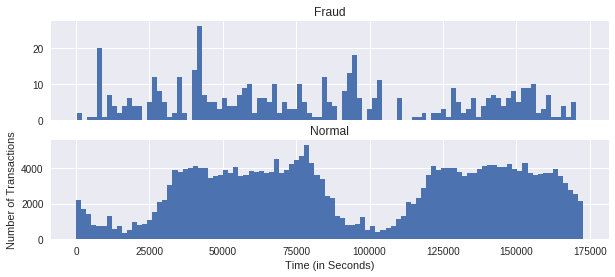

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 100

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

As we can see for normal transactions, there is a cyclical nature for number of transaction per second, whereas for fraudulent transactions, there are highs and lows but not cyclical nature.
Hence we can create new features which bin the transaction <b> by which day it occurred on(day 1 or day 2) </b> and the  <b>time relative to this day </b>(3600 means 1 hr in day 1 and 90000 means 1st hour again but for day2 (86400sec per day+ 3600 sec of day 2))

#### Let's take a look at the distribution of the amounts of money that were transferred:

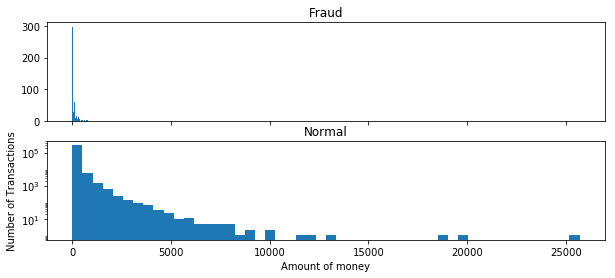

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 50

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount of money')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

Contrary to the general notion that majority of the fraudulent transactions have higher sums of money, the graph shows us that most of the fraudulent transactions occur for lower sums of money. However, as we have fewer fraudulent transactions as compared to normal ones, this may affect or bias the conclusion.

### We can also check and see if number of fraudulent transactions are higher according to a certain time !


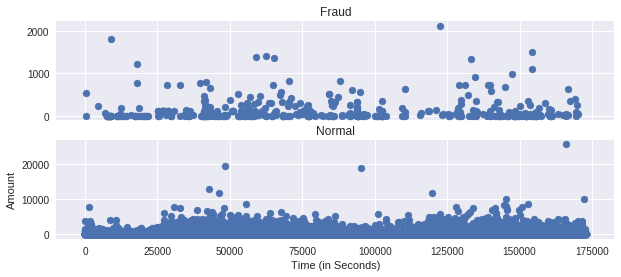

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

frauds = df[df.Class == 1]
normal = df[df.Class == 0]

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

However, it seems like the time of transaction doesn't really matter.

### Compare mean, quartiles for time for both the days to see if there is a significant difference

In [9]:
df[df['day']==0]['time_of_day'].describe()

count    144787.000000
mean      52947.904480
std       21349.781819
min           0.000000
25%       38432.000000
50%       54689.000000
75%       70977.000000
max       86400.000000
Name: time_of_day, dtype: float64

In [10]:
df[df['day']==1]['time_of_day'].describe()

count    140020.000000
mean      51705.146822
std       20715.119744
min           1.000000
25%       37842.750000
50%       53425.000000
75%       68182.500000
max       86392.000000
Name: time_of_day, dtype: float64

As we can see there is no significant difference in the mean, quartiles for time on both the days(datapoint is not distinguishable by the day transaction occurs)

#### Shuffle the data so that it becomes truly random

In [7]:
df = shuffle(df)

### We will create train-test splits here itself and then work with resampling techniques as in real world the assumption is that test data is always unseen,and hence should not be resampled.

In [9]:
y = df['Class']
X = df.drop('Class',axis=1)
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [16]:
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.35, random_state = 999)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  185124
Number transactions test dataset:  99683
Total number of transactions:  284807


### Re-sampling techniques 

#### Technique 1 - SMOTEENN

In [18]:
from imblearn.combine import SMOTEENN

sm1 = SMOTEENN()
X_SMOTEENN, Y_SMOTEENN = sm1.fit_sample(X_train, Y_train)
df_SMOTEENN = pd.DataFrame(X_SMOTEENN)
#df_SMOTEENN = df_SMOTEENN.assign(Class=Y_SMOTEENN)

In [21]:
df_SMOTEENN= df_SMOTEENN.drop('Class',axis=1)

#### Technique 2 - SMOTETOMEK

In [28]:
from imblearn.combine import SMOTETomek
sm2 = SMOTETomek()

X_SMOTETomek, Y_SMOTETomek = sm2.fit_sample(X_train, Y_train)
df_SMOTETomek = pd.DataFrame(X_SMOTETomek)
#df_SMOTETomek = df_SMOTETomek.assign(Class=Y_SMOTETomek)

### Feature importance of the original and resampled data

Feature ranking:
1. feature 17 (0.127604)
2. feature 12 (0.105090)
3. feature 14 (0.090248)
4. feature 16 (0.075137)
5. feature 10 (0.073305)
6. feature 11 (0.064509)
7. feature 3 (0.051151)
8. feature 4 (0.047641)
9. feature 18 (0.035484)
10. feature 9 (0.026694)
11. feature 7 (0.026557)
12. feature 2 (0.020160)
13. feature 5 (0.017331)
14. feature 21 (0.016899)
15. feature 0 (0.016899)
16. feature 19 (0.016525)
17. feature 8 (0.016365)
18. feature 26 (0.015224)
19. feature 6 (0.014935)
20. feature 28 (0.014524)
21. feature 27 (0.014191)
22. feature 20 (0.013909)
23. feature 15 (0.013723)
24. feature 13 (0.013518)
25. feature 24 (0.013237)
26. feature 29 (0.012974)
27. feature 1 (0.012943)
28. feature 25 (0.011783)
29. feature 22 (0.011293)
30. feature 23 (0.010149)


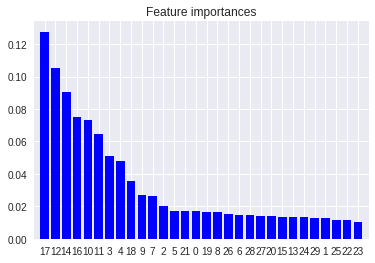

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50, random_state=999)
forest.fit(X_train, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
 
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

As we can see features 12, 14, 17, 11, 16 and 10 are most important in the original data.

### Feature Importance for re-sampled data

Feature ranking:
1. feature 14 (0.156303)
2. feature 12 (0.126284)
3. feature 16 (0.090087)
4. feature 11 (0.084492)
5. feature 4 (0.082905)
6. feature 17 (0.080024)
7. feature 3 (0.079866)
8. feature 10 (0.062352)
9. feature 18 (0.031244)
10. feature 9 (0.028819)
11. feature 1 (0.021546)
12. feature 7 (0.017634)
13. feature 6 (0.013782)
14. feature 0 (0.012939)
15. feature 19 (0.012851)
16. feature 5 (0.012532)
17. feature 2 (0.008259)
18. feature 24 (0.007879)
19. feature 8 (0.007650)
20. feature 21 (0.007277)
21. feature 13 (0.006886)
22. feature 29 (0.006818)
23. feature 27 (0.006203)
24. feature 15 (0.006174)
25. feature 20 (0.005647)
26. feature 22 (0.005571)
27. feature 26 (0.005413)
28. feature 25 (0.004827)
29. feature 23 (0.004415)
30. feature 28 (0.003322)


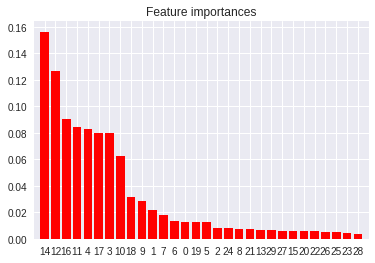

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50, random_state=999)
forest.fit(df_SMOTEENN, Y_SMOTEENN)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
 
for f in range(df_SMOTEENN.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_SMOTEENN.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(df_SMOTEENN.shape[1]), indices)
plt.xlim([-1, df_SMOTEENN.shape[1]])
plt.show()

As we can see, features 12, 14, 11, 16, 4, 17 and 3 are most important in the resampled data. Some of the features are new, but mostly they overlap with important features from original data, so re-sampling does not affect feature importance.

/home/mani/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


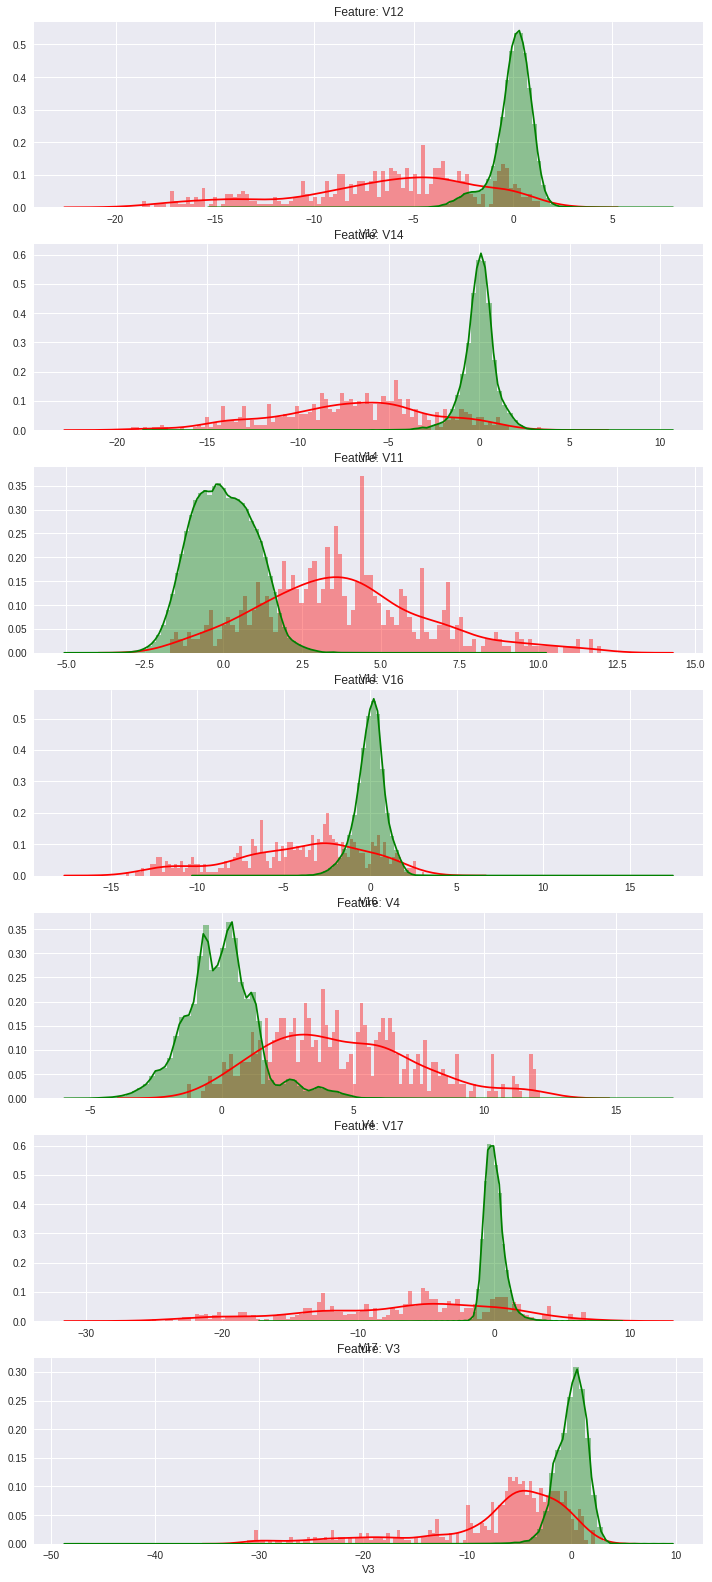

In [6]:
### Understanding the anonymized features:
imp_features = df.ix[:,[12, 14, 11, 16, 4, 17,3]].columns
plt.figure(figsize=(12,7*4))
gs = gridspec.GridSpec(7, 1)
for i, cn in enumerate(df[imp_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=100,color='red')
    sns.distplot(df[cn][df.Class == 0], bins=100,color='green')
    ax.set_title('Feature: ' + str(cn))
plt.show()

As we can see, there is a significant difference in distribution of features for normal and fraudulent class.

### Plot T-SNE of original data

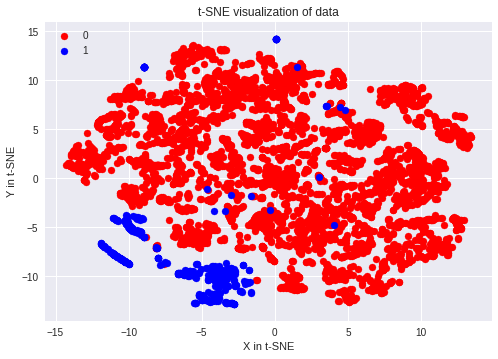

In [12]:
#Set df2 equal to all of the fraulent and 10,000 normal transactions.
tsne_data = df
df2 = tsne_data[tsne_data.Class == 1]
df2 = pd.concat([df2, tsne_data[tsne_data.Class == 0].sample(n = 5000)], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df2_std = standard_scaler.fit_transform(df2)

#Set y equal to the target values.
y_n = df2.ix[:,-1].values
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df2_std)

color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y_n==cl,0], 
                y = x_test_2d[y_n==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of data')
plt.show()

t-SNE is a method to generate lower dimesion reporesentation/embeddinggs of higher dimensional datasets. It can be leveraged to visualize clusters of similar datapoints. For the visualization we sample 5000 points from normal transactions and all fraudulent transactions; frauds are represented by blue(1) and have slight dispersion 
while most of the points confined to one dense/major cluster. 